In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
G = nx.Graph()
nodes_mapping = []
people = pd.read_csv("message.csv",header=None,names=['name', 'fullname', 'isalive', 'group'])
data = pd.read_csv("relation_message.csv",header=None,names=['begin', 'end', 'relationship']).values
for row in people.values:
    nodes_mapping.append(row[0])
for i in range(len(nodes_mapping)):
    G.add_node(i)
for i in data:
    G.add_edge(nodes_mapping.index(i[0]),nodes_mapping.index(i[1]),relation=i[2])

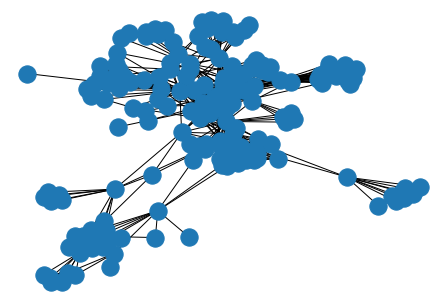

In [2]:
nx.draw(G)

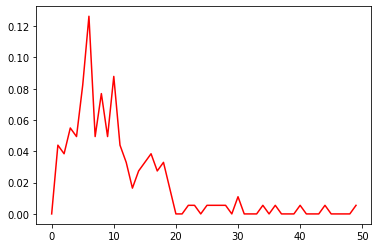

range(0, 50)
[0.0, 0.04395604395604396, 0.038461538461538464, 0.054945054945054944, 0.04945054945054945, 0.08241758241758242, 0.12637362637362637, 0.04945054945054945, 0.07692307692307693, 0.04945054945054945, 0.08791208791208792, 0.04395604395604396, 0.03296703296703297, 0.016483516483516484, 0.027472527472527472, 0.03296703296703297, 0.038461538461538464, 0.027472527472527472, 0.03296703296703297, 0.016483516483516484, 0.0, 0.0, 0.005494505494505495, 0.005494505494505495, 0.0, 0.005494505494505495, 0.005494505494505495, 0.005494505494505495, 0.005494505494505495, 0.0, 0.01098901098901099, 0.0, 0.0, 0.0, 0.005494505494505495, 0.0, 0.005494505494505495, 0.0, 0.0, 0.0, 0.005494505494505495, 0.0, 0.0, 0.0, 0.005494505494505495, 0.0, 0.0, 0.0, 0.0, 0.005494505494505495]


In [3]:
degree = nx.degree_histogram(G)
x = range(len(degree))
y = [z/float(sum(degree)) for z in degree]
plt.plot(x,y,color=(1,0,0))
# plt.savefig("degree.png")
plt.show()
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


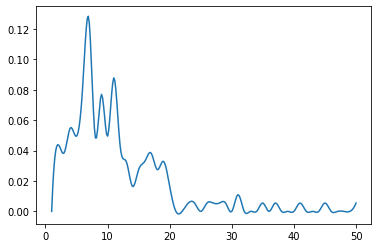

In [4]:
from scipy.interpolate import make_interp_spline
x = []
for i in range(len(degree)):
    x.append(i+1)
print(x)
x = np.array(x)
x_smooth = np.linspace(x.min(),x.max(),300)
y_smooth = make_interp_spline(x,y)(x_smooth)
plt.plot(x_smooth,y_smooth)
# plt.savefig("degree.png")
plt.show()

In [5]:
people.loc[:,'centrality'] = nx.degree_centrality(G).values()
people

,name,fullname,isalive,group,centrality
0,tonys,Tony Stark,alive,human,0.270718
1,stever,Steve Rogers,alive,human,0.220994
2,bruceb,Bruce Banner,alive,human,0.165746
3,thor,Thor,alive,asgardian,0.243094
4,blackw,Natasha Romanoff,alive,human,0.198895
...,...,...,...,...,...
177,ebonym,The Ebony Maw,alive,unknown,0.027624
178,obsidianc,Obsidian Cull,alive,unknown,0.027624
179,outrider,Outriders,alive,unknown,0.027624
180,bettyb,Betty Brant,alive,human,0.033149


In [6]:
d = nx.degree_centrality(G)
# d

In [7]:
people.loc[:,'hits'] = nx.hits(G)[0].values()
people

,name,fullname,isalive,group,centrality,hits
0,tonys,Tony Stark,alive,human,0.270718,0.030094
1,stever,Steve Rogers,alive,human,0.220994,0.030554
2,bruceb,Bruce Banner,alive,human,0.165746,0.023730
3,thor,Thor,alive,asgardian,0.243094,0.030741
4,blackw,Natasha Romanoff,alive,human,0.198895,0.029922
...,...,...,...,...,...,...
177,ebonym,The Ebony Maw,alive,unknown,0.027624,0.000152
178,obsidianc,Obsidian Cull,alive,unknown,0.027624,0.000152
179,outrider,Outriders,alive,unknown,0.027624,0.000152
180,bettyb,Betty Brant,alive,human,0.033149,0.001285


In [8]:
hits = nx.hits(G)
# hits[0]

In [9]:
people.loc[:,'pagerank'] = nx.pagerank(G).values()
people

,name,fullname,isalive,group,centrality,hits,pagerank
0,tonys,Tony Stark,alive,human,0.270718,0.030094,0.027758
1,stever,Steve Rogers,alive,human,0.220994,0.030554,0.018146
2,bruceb,Bruce Banner,alive,human,0.165746,0.023730,0.014206
3,thor,Thor,alive,asgardian,0.243094,0.030741,0.018730
4,blackw,Natasha Romanoff,alive,human,0.198895,0.029922,0.016923
...,...,...,...,...,...,...,...
177,ebonym,The Ebony Maw,alive,unknown,0.027624,0.000152,0.004219
178,obsidianc,Obsidian Cull,alive,unknown,0.027624,0.000152,0.004219
179,outrider,Outriders,alive,unknown,0.027624,0.000152,0.004219
180,bettyb,Betty Brant,alive,human,0.033149,0.001285,0.004251


In [10]:
pagerank = nx.pagerank(G)
# pagerank

In [11]:
people.to_csv("math_message.csv")

In [12]:
people.columns

Index(['name', 'fullname', 'isalive', 'group', 'centrality', 'hits',
       'pagerank'],
      dtype='object')

In [13]:
people.sort_values(by='centrality',ascending=False)[:10]

,name,fullname,isalive,group,centrality,hits,pagerank
0,tonys,Tony Stark,alive,human,0.270718,0.030094,0.027758
3,thor,Thor,alive,asgardian,0.243094,0.030741,0.018730
1,stever,Steve Rogers,alive,human,0.220994,0.030554,0.018146
4,blackw,Natasha Romanoff,alive,human,0.198895,0.029922,0.016923
52,loki,Loki,alive,frost giant,0.187845,0.023603,0.014662
79,bucky,Bucky Barnes,alive,human,0.165746,0.022168,0.014060
2,bruceb,Bruce Banner,alive,human,0.165746,0.023730,0.014206
93,tchalla,T'Challa,alive,human,0.154696,0.018425,0.012230
5,rhody,James Rhodes,alive,human,0.149171,0.022708,0.013465
6,hawke,Clint Barton,alive,human,0.143646,0.026248,0.012191


In [14]:
people.sort_values(by='hits',ascending=False)[:10]

,name,fullname,isalive,group,centrality,hits,pagerank
3,thor,Thor,alive,asgardian,0.243094,0.030741,0.018730
1,stever,Steve Rogers,alive,human,0.220994,0.030554,0.018146
0,tonys,Tony Stark,alive,human,0.270718,0.030094,0.027758
4,blackw,Natasha Romanoff,alive,human,0.198895,0.029922,0.016923
6,hawke,Clint Barton,alive,human,0.143646,0.026248,0.012191
2,bruceb,Bruce Banner,alive,human,0.165746,0.023730,0.014206
52,loki,Loki,alive,frost giant,0.187845,0.023603,0.014662
5,rhody,James Rhodes,alive,human,0.149171,0.022708,0.013465
8,falcon,Sam Wilson,alive,human,0.121547,0.022707,0.009951
79,bucky,Bucky Barnes,alive,human,0.165746,0.022168,0.014060


In [15]:
people.sort_values(by='pagerank',ascending=False)[:10]

,name,fullname,isalive,group,centrality,hits,pagerank
0,tonys,Tony Stark,alive,human,0.270718,0.030094,0.027758
3,thor,Thor,alive,asgardian,0.243094,0.030741,0.018730
1,stever,Steve Rogers,alive,human,0.220994,0.030554,0.018146
4,blackw,Natasha Romanoff,alive,human,0.198895,0.029922,0.016923
52,loki,Loki,alive,frost giant,0.187845,0.023603,0.014662
2,bruceb,Bruce Banner,alive,human,0.165746,0.023730,0.014206
79,bucky,Bucky Barnes,alive,human,0.165746,0.022168,0.014060
148,peterp,Peter Parker,alive,human,0.138122,0.015921,0.013818
5,rhody,James Rhodes,alive,human,0.149171,0.022708,0.013465
93,tchalla,T'Challa,alive,human,0.154696,0.018425,0.012230


In [16]:
people

,name,fullname,isalive,group,centrality,hits,pagerank
0,tonys,Tony Stark,alive,human,0.270718,0.030094,0.027758
1,stever,Steve Rogers,alive,human,0.220994,0.030554,0.018146
2,bruceb,Bruce Banner,alive,human,0.165746,0.023730,0.014206
3,thor,Thor,alive,asgardian,0.243094,0.030741,0.018730
4,blackw,Natasha Romanoff,alive,human,0.198895,0.029922,0.016923
...,...,...,...,...,...,...,...
177,ebonym,The Ebony Maw,alive,unknown,0.027624,0.000152,0.004219
178,obsidianc,Obsidian Cull,alive,unknown,0.027624,0.000152,0.004219
179,outrider,Outriders,alive,unknown,0.027624,0.000152,0.004219
180,bettyb,Betty Brant,alive,human,0.033149,0.001285,0.004251


In [17]:
from math import sqrt
from pygraph.classes.digraph import digraph
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
data = pd.read_csv("relation_message.csv",header=None,names=['begin','end','relationship'])

In [19]:
class HITSIterator:
    __doc__ = "FILE_PATH"
    
    def __init__(self,dg):
        # 最大迭代次数
        self.max_iterations = 100
        # 迭代结束条件
        self.min_delta = 0.0001
        self.graph = dg
        
        self.hub = {}
        self.authority = {}
        for node in self.graph.nodes():
            self.hub[node] = 1
            self.authority[node] = 1
            
    def hits(self):
        # 计算每个页面的hub、authority值
        
        if not self.graph:
            return
        
        flag = False
        # 遍历迭代
        for i in range(self.max_iterations):
            # 记录每轮的变化值
            change = 0.0
            # 标准化系数
            norm = 0
            tmp = {}
            # 计算每个页面的authority值
            tmp = self.authority.copy()
            for node in self.graph.nodes():
                self.authority[node] = 0
                # 遍历所有入射页面
                for incident_page in self.graph.incidents(node):
                    self.authority[node] += self.hub[incident_page]
                norm += pow(self.authority[node],2)
            # 标准化
            norm = sqrt(norm)
            for node in self.graph.nodes():
                self.authority[node] /= norm
                change += abs(tmp[node] - self.authority[node])
                
            # 计算每个页面的hub值
            norm = 0
            tmp = self.hub.copy()
            for node in self.graph.nodes():
                self.hub[node] = 0
                # 遍历所有出射页面
                for neighbor_page in self.graph.neighbors(node):
                    self.hub[node] += self.authority[neighbor_page]
                norm += pow(self.hub[node],2)
            # 标准化
            norm = sqrt(norm)
            for node in self.graph.nodes():
                self.hub[node] /= norm
                change += abs(tmp[node] - self.hub[node])
                
#             print("This is No. %s iteration" % (i + 1))
#             print("authority",self.authority)
#             print("hub",self.hub)
            
            if change < self.min_delta:
                flag = True
                break
        if flag:
            print("finished in %s iterations!" % (i + 1))
        else:
            print("finished out of 100 iterations!")
            
#         print("===============================================================")
#         print("The best authority page:",self.authority.items())
#         print("===============================================================")
#         print("The best hub page:",self.hub.items())
        return self.authority.items(),self.hub.items()

In [20]:
data

,begin,end,relationship
0,tonys,rhody,friend
1,tonys,hawke,friend
2,tonys,stever,friend
3,tonys,falcon,friend
4,tonys,nickf,friend
...,...,...,...
1139,stanlee,eriks,friend
1140,stanlee,tonys,friend
1141,stanlee,rhody,friend
1142,stanlee,thor,friend


In [21]:
nodes = pd.read_csv("message.csv",header=None,names=['name','fullname','isalive','intro'])

In [22]:
nodes

,name,fullname,isalive,intro
0,tonys,Tony Stark,alive,human
1,stever,Steve Rogers,alive,human
2,bruceb,Bruce Banner,alive,human
3,thor,Thor,alive,asgardian
4,blackw,Natasha Romanoff,alive,human
...,...,...,...,...
177,ebonym,The Ebony Maw,alive,unknown
178,obsidianc,Obsidian Cull,alive,unknown
179,outrider,Outriders,alive,unknown
180,bettyb,Betty Brant,alive,human


In [23]:
dg = digraph()

In [24]:
nodes_list = list(nodes['name'].values)
dg.add_nodes(nodes_list)
for row in data.values:
    try:
        dg.add_edge((row[0],row[1]))
    except:
        continue

In [25]:
hits = HITSIterator(dg)
auth_val,hub_val = hits.hits()

finished in 22 iterations!


In [26]:
auth = []

In [27]:
for i in auth_val:
    auth.append(i[1])
# auth

In [28]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [29]:
people.loc[:,"auth"] = auth
people

,name,fullname,isalive,group,centrality,hits,pagerank,auth
0,tonys,Tony Stark,alive,human,0.2707,0.0301,0.0278,0.0247
1,stever,Steve Rogers,alive,human,0.2210,0.0306,0.0181,0.1939
2,bruceb,Bruce Banner,alive,human,0.1657,0.0237,0.0142,0.1479
3,thor,Thor,alive,asgardian,0.2431,0.0307,0.0187,0.1377
4,blackw,Natasha Romanoff,alive,human,0.1989,0.0299,0.0169,0.1927
...,...,...,...,...,...,...,...,...
177,ebonym,The Ebony Maw,alive,unknown,0.0276,0.0002,0.0042,0.0000
178,obsidianc,Obsidian Cull,alive,unknown,0.0276,0.0002,0.0042,0.0000
179,outrider,Outriders,alive,unknown,0.0276,0.0002,0.0042,0.0000
180,bettyb,Betty Brant,alive,human,0.0331,0.0013,0.0043,0.0027


In [30]:
# hub_val

In [31]:
hub = []
for i in hub_val:
    hub.append(i[1])
len(hub)

182

In [32]:
people.loc[:,'hub'] = hub

In [33]:
people

,name,fullname,isalive,group,centrality,hits,pagerank,auth,hub
0,tonys,Tony Stark,alive,human,0.2707,0.0301,0.0278,0.0247,0.3867
1,stever,Steve Rogers,alive,human,0.2210,0.0306,0.0181,0.1939,0.3603
2,bruceb,Bruce Banner,alive,human,0.1657,0.0237,0.0142,0.1479,0.2817
3,thor,Thor,alive,asgardian,0.2431,0.0307,0.0187,0.1377,0.3618
4,blackw,Natasha Romanoff,alive,human,0.1989,0.0299,0.0169,0.1927,0.3406
...,...,...,...,...,...,...,...,...,...
177,ebonym,The Ebony Maw,alive,unknown,0.0276,0.0002,0.0042,0.0000,0.0000
178,obsidianc,Obsidian Cull,alive,unknown,0.0276,0.0002,0.0042,0.0000,0.0000
179,outrider,Outriders,alive,unknown,0.0276,0.0002,0.0042,0.0000,0.0000
180,bettyb,Betty Brant,alive,human,0.0331,0.0013,0.0043,0.0027,0.0002


In [34]:
people.to_csv("math_message_all.csv")